In [1]:
import numpy as np
import keras
from keras.layers import Dense, Input, Add
from keras.models import Sequential, Model, load_model

Using TensorFlow backend.


In [2]:
P = np.array([
    [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
    [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0],
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1],
    [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1],
], dtype='int')

In [3]:
def awgn(x_input, reqSNR):
    sig_power = 1
    
    noise_power = np.sqrt(sig_power / (2*reqSNR))
    noise = noise_power * np.random.normal(size = x_input.shape)
    
    return x_input + noise

In [116]:
x_train = np.ones((1,23))

In [5]:
model = load_model('model/golay.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [128]:
test_model = Model(inputs=model.input, outputs=model.layers[8].output)

In [118]:
Eb_No = 10**(5/10)
Es_No = Eb_No * (12/23)
noise_power = np.sqrt(1 / (2*Es_No))
noise = noise_power * np.random.normal()
x_train_noisy = np.ones((1,23))
x_train_noisy[:,0] = x_train_noisy[:,0]+noise

In [129]:
a = test_model.predict(x_train)

In [130]:
b = test_model.predict(x_train_noisy)

In [122]:
print(x_train_noisy[0])

[0.20894924 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


In [123]:
print(x_train[0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [124]:
print(np.mean(np.abs(x_train[0]-x_train_noisy[0])))

0.034393511305932226


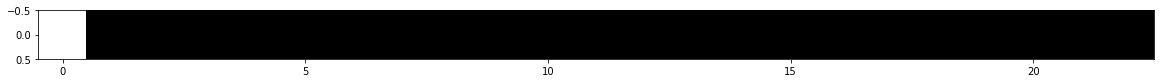

In [125]:
import matplotlib.pyplot as plt
c = np.reshape(np.abs(x_train[0]-x_train_noisy[0]),(1,23))
plt.imshow(c, cmap='gray')
plt.show()

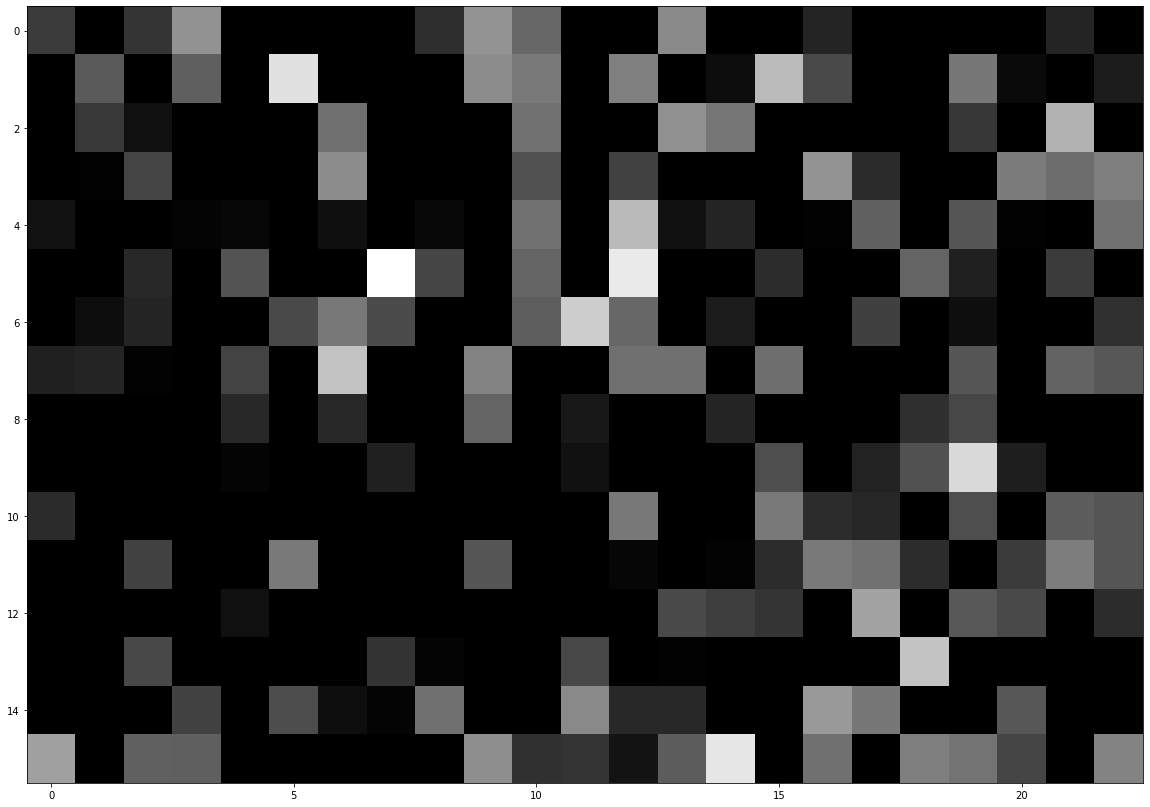

In [126]:
e = np.reshape(np.abs(a[0]-b[0]),(16,23))
plt.rcParams["figure.figsize"] = (20,100)
plt.imshow(e, cmap='gray')
plt.show()

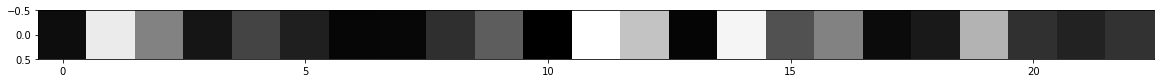

In [131]:
f = np.reshape(np.abs(a[0]-b[0]),(1,23))
plt.rcParams["figure.figsize"] = (20,100)
plt.imshow(f, cmap='gray')
plt.show()

In [133]:
print(a)
print(b)

[[0.99969745 0.99828887 0.9995386  0.99946356 0.99931484 0.9998876
  0.9990193  0.99996084 0.9990677  0.9991706  0.9999196  0.9984225
  0.9978809  0.9996915  0.9988174  0.99962366 0.99923414 0.9993117
  0.9997451  0.9991525  0.9990765  0.99845845 0.99898046]]
[[0.9996333  0.99719375 0.9989331  0.9993629  0.99963194 0.9997382
  0.9989887  0.99992275 0.9988443  0.9987374  0.9999206  0.99723315
  0.9969657  0.99971986 0.9976779  0.9992451  0.99862534 0.9993682
  0.9998626  0.99831796 0.99884355 0.9982972  0.9987431 ]]


In [132]:
print(np.mean(np.abs(a[0]-b[0])))

0.00038948006


In [16]:
print(np.mean(np.abs(x_train_noisy[0]-x_train[0])))
print(np.var(np.abs(x_train_noisy[0]-x_train[0])))

0.47406851159064817
0.0905791302142426


In [17]:
print(np.mean(np.abs(b[0]-a[0])))
print(np.var(np.abs(b[0]-a[0])))

2.3132339
12.16427


In [320]:
print(np.mean(b[0]-a[0]))
print(np.var(b[0]-a[0]))

0.0
0.0


In [290]:
print(np.mean(b[0]-a[0]))
print(np.var(b[0]-a[0]))

-0.22710742
1.6440324


In [296]:
print(np.mean(b[0]-a[0]))
print(np.var(b[0]-a[0]))

-1.5355202
13.934249


In [302]:
print(np.mean(b[0]-a[0]))
print(np.var(b[0]-a[0]))

-6.543838
116.836784


In [308]:
print(np.mean(b[0]-a[0]))
print(np.var(b[0]-a[0]))

-9.865593
107.73384


In [232]:
print(np.mean(b[0]-a[0]))
print(np.var(b[0]-a[0]))

-16.420279
250.03331


In [274]:
print(np.mean(b[0]-a[0]))
print(np.var(b[0]-a[0]))

-0.0013310987
4.4075994e-05
